# Homework 05: FFT for FDM, Image-Based Simulation

# Date: 11/15/2018
# Due: 11/26/2018; 10:30 PM
## Objectives: We will practice on using FFT to solving PDE, and do one image-based simulation.

---
### Your name: Boyao Zhu

---
## Problem 1 Fourier Spectrum method. 
Fourier spectrum method is a common technique for solving differential equations. Instead of solving the equation in the real space, it uses FFT to solve equations in the Fourier space. Previously, we have solved diffusion in the real space. Here, we will try to solve diffusion equation using Fourier spectrum method.

In our previous assignements, we have solved the diffusion equation:

$$ \frac{\partial C}{\partial t} = \frac{\partial^2 C}{\partial x^2}.$$

Here, we have set the diffusivity to be 1. The initial concentration is 

$$ C^0 = \exp \bigg( \frac{-(x-0.5)^2}{0.4} \bigg).$$

The domain size is 20, and let's discretize the domain into 256 grid points.

---
**1.1: Complete the code below to simulate the diffusion in the real space as we have done previously. Here, we will impose periodic boundary condition. Investigate and impose periodic boundary conditions to the two ends of the 1D domain. **

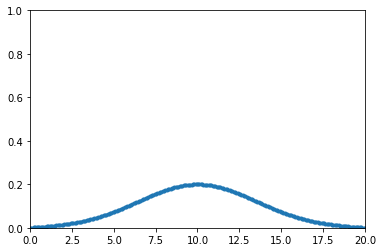

In [5]:
# load library
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# parameters
gpt = 256
Lx = 20
Xp = np.linspace(0,Lx,gpt)
dx = Xp[2]-Xp[1]
dt = 1e-3

# initial condition
C = np.zeros(gpt)
C = np.exp(-(Xp-10.0)**2/1)

# time iteration
tm = 0
cnt = 0
Lap = np.zeros(gpt)

for iter in range(6000):
    
    Lap[1:gpt-1] = (C[0:gpt-2]+C[2:gpt]-2*C[1:gpt-1])/dx**2  # <== fill the blank
    C[1:gpt-1] = Lap[1:gpt-1] * dt + C[1:gpt-1]    # <== fill the blank
    
    # boundary condition; periodic boundary condition
    C[0] = C[gpt-1]      # <== fill the blank
    C[gpt-1] = C[0]  # <== fill the blank
    
    tm = tm + dt

    if tm >= cnt*3e-2:
        clear_output(wait=True)
        
        plt.plot(Xp,C,'.-')
        plt.axis([0,Lx,0,1])
        plt.show()
        cnt = cnt + 1   
        time.sleep(0.01)

---
**Let's now try to solve the diffusion equation in the Fourier space. **

**1.2:** Examine the first and second derivatives using Fourier transform. The Fourier transform of $f'(x)$ is $ ik F(k) $, where $i$ is the imaginary elementray number, $k$ is the index in the k space, and $F(k)$ is the Fourier transform of $f(x)$. For the second derivative, $-k^2 F(k)$ is the Fourier transform of $f''(x)$. As a result, the diffusion equation in the Fourier space is 

$$\frac{\partial F(k)}{\partial t} = -k^2 F(k).$$

In the cell below, the k indices are given. Use FFT and inverse FFT to calculate the first and second derivatives of the intial concentration, compare the result to those calculated using central difference schemes. 

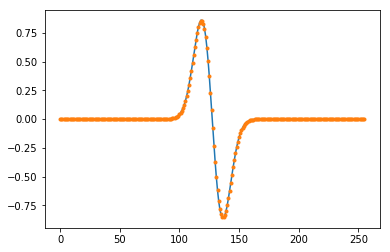

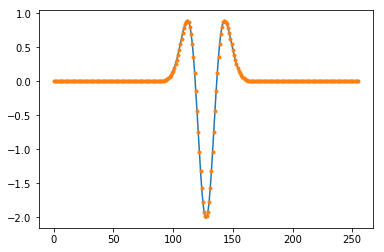

In [22]:
# initial concentration
f = np.exp(-(Xp-10.0)**2/1)

# k space
k1 = np.arange(-(int(gpt/2)-1),(int(gpt/2)+1))
k = np.zeros(gpt)
k[0:int(gpt/2)+1] = k1[int(gpt/2)-1:]
k[int(gpt/2)+1:] = k1[0:int(gpt/2)-1]
k = k*2*(np.pi)/Lx

# Your code:
import numpy as np
# Calculate ikF(k) and inverse FFT it. You only need to plot the real part of the result.
F_k = np.fft.fft(f)
kF_k = 1j * k * F_k
f_ = np.fft.ifft(kF_k)
plt.plot(f_.real,'-')

# Calculate f'(x) using the central difference scheme, and plot it.
f_prime = np.zeros(gpt)
f_prime[1:gpt-1] = (-f[0:gpt-2]+f[2:gpt])/(2*dx)
plt.plot(f_prime,'.')
plt.show()
# Calculate -k^2 F(k) and inverse FFT it. You only need to plot the real part of the result.
k2F_k = -k**2*F_k
f__ = np.fft.ifft(k2F_k)
plt.plot(f__.real,'-')



# Calculate f''(x) using the central difference scheme, and plot it.
f_2prime = np.zeros(gpt)
f_2prime[1:gpt-1] = (f[0:gpt-2]+f[2:gpt]-2*f[1:gpt-1])/dx**2
plt.plot(f_2prime,'.')
plt.show()

# well done Lol

** The results from Fourier spectrum method should agree with those from finite difference scheme. **

---
**1.3: ** Run the diffusion simulation in the Fourier space. 

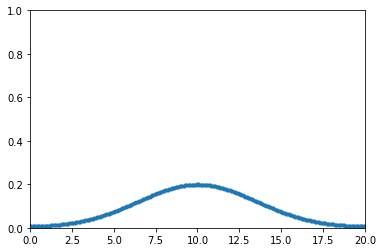

In [23]:
# initial concentration
f = np.exp(-(Xp-10.0)**2/1)

# take FFT of f
F_ft = np.fft.fft(f)      # <== fill the blank

# time iteration
tm = 0
cnt = 0
dt = 1.0e-3
for iter in range(6000):
    
    F_ft = -k**2*F_ft * dt + F_ft  # <== fill the blank
    
    tm = tm + dt

    if tm >= cnt*3e-2:
        clear_output(wait=True)
        
        f_re = np.fft.ifft(F_ft).real  # <== fill the blank, make the plot in real space
        
        plt.plot(Xp,f_re.real,'.-')
        plt.axis([0,Lx,0,1])
        plt.show()
        cnt = cnt + 1   
        time.sleep(0.01)    



---
## Problem 2 The Smoothed Boundary Method

We will do a simple diffusion over the Sparton helmet using SBM. You can find more information of the SBM in the paper linked below.

http://iopscience.iop.org/article/10.1088/0965-0393/20/7/075008/meta

** Download the image "MySparty_01.jpg"**

In [1]:
import numpy as np
import imageio
import matplotlib.pylab as plt
from scipy.misc import imread

from IPython.display import display, clear_output
from matplotlib import cm
import time 

im1 = imread("MySparty_01.jpg") # <== fill the blank
plt.imshow(im1)
plt.colorbar()
im1.shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


(110, 122)

**Normalize the the pixel intensity to be between 0 and 1.**

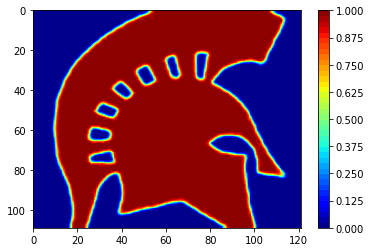

In [2]:

psi = im1/np.amax(im1)  # <== fill the blank

# size of the matrix
[ny, nx] = [110,122]  # <== fill the blank

# Here, for simplicity, we will set the value of psi below 5e-2 to be 0.
for i in range(ny):
    for j in range(nx):
        if psi[i,j] <= 5.0e-2:
            psi[i,j] = 0.0e0
            
plt.contourf(psi, 40, cmap=cm.jet)  
plt.colorbar()
plt.gca().invert_yaxis()

**This $\psi$ is the so-called domain parameter, which is uniformly 1 within the domain of interest, and uniformly 0 outside. Here $\psi=1$ is where diffusion can occur.**

**We can reformulate the diffusion equation with the domain parameter as the following. **

$$\frac{\partial C}{\partial t} = D \nabla^2 C ~~\Longrightarrow~~ \frac{\partial C}{\partial t} = \frac{D}{\psi}  \nabla \cdot \bigg( \psi \nabla C \bigg) + \frac{|\nabla \psi|}{ \psi} D B_n$$

**where $B_n$ is the normal gradient at the boundary. For no-flux boundary condition on the boundary ($\psi = 0.5$), the second term disappears.**



---
**2.1**

$$ \frac{\partial C}{\partial t} = \frac{D}{\psi}  \nabla \cdot \bigg( \psi \nabla C \bigg) $$

** Write the finite difference stencil for the SBM diffusion equation above for a 2D case.**

**Your answer: **
$$\frac{C_{i,j}^{n+1}-C_{i,j}^{n}}{\Delta t} =  \frac{D}{\psi}\frac{1}{\Delta x}\bigg( \frac{\psi_{i+1,j}+\psi_{i,j}}{2} \cdot \frac{C_{i+1,j}^n - C_{i,j}^n}{\Delta x} - \frac{\psi_{i,j}+\psi_{i-1,j}}{2} \cdot \frac{C_{i,j}^n - C_{i-1,j}^n}{\Delta x}\bigg) + \\  \frac{D}{\psi}\frac{1}{\Delta y}\bigg( \frac{\psi_{i,j+1}+\psi_{i,j}}{2} \cdot \frac{C_{i,j+1}^n - C_{i,j}^n}{\Delta y} - \frac{\psi_{i,j}+\psi_{i,j-1}}{2} \cdot \frac{C_{i,j}^n - C_{i,j-1}^n}{\Delta y}\bigg).$$


---
**Next, because there is a $1/\psi$, to avoid numerical instability, we only calculate the right-hand side at grid points where $\psi > \varepsilon$. Let's set $\varepsilon = 0.01$ in this simulation. **

** 2.2 Complete the code below and run the simulation. The boundary condition is set up such that the influx diffusion occurs from the top and the lower left of the helmet.**



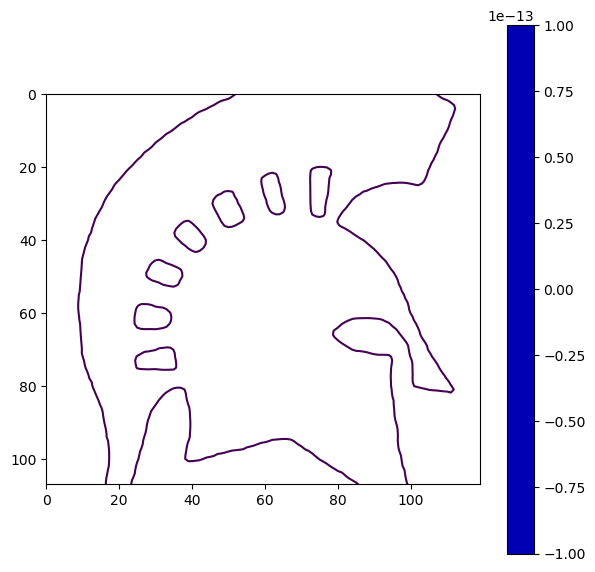

6000


In [6]:

D = 1.0

dx = 1.0
dt = dx**2/D/10


C = np.zeros((ny,nx))
Lap = np.zeros((ny,nx))

for iter in range(6001):
    
    ## your code here
    Lap[1:ny-1,1:nx-1] = (psi[2:ny,1:nx-1]+psi[1:ny-1,1:nx-1])*(C[2:ny,1:nx-1]-C[1:ny-1,1:nx-1]) \
                        -(psi[1:ny-1,1:nx-1]+psi[0:ny-2,1:nx-1])*(C[1:ny-1,1:nx-1]-C[0:ny-2,1:nx-1]) \
                        +(psi[1:ny-1,2:nx]+psi[1:ny-1,1:nx-1])*(C[1:ny-1,2:nx]-C[1:ny-1,1:nx-1]) \
                        -(psi[1:ny-1,1:nx-1]+psi[1:ny-1,0:nx-2])*(C[1:ny-1,1:nx-1]-C[1:ny-1,0:nx-2])
    Lap[1:ny-1,1:nx-1] = Lap[1:ny-1,1:nx-1]/2/dx**2
    
    C[1:ny-1,1:nx-1] = Lap[1:ny-1,1:nx-1]/psi[1:ny-1,1:nx-1]*dt + C[1:ny-1,1:nx-1]

    
    # boundary condition
    C[0,1:nx-1] = 1.0
    C[ny-1,0:61] = 1.0
    C[ny-1,61:nx-1] = C[ny-2,61:nx-1]
    
    C[0:ny,0] = C[0:ny,1]
    C[0:ny,nx-1] = C[0:ny,nx-2]
    
    
                        
    if iter%50 == 0:
        clear_output(wait=True) # Clear output for dynamic display
        
        fig = plt.figure(figsize=(7, 7), dpi=100)
        plt.contour(psi[1:ny-1,1:nx-1],1)
        plt.contourf(C[1:ny-1,1:nx-1], 40, cmap=cm.jet)
        
        plt.gca().invert_yaxis()
        plt.axes().set_aspect('equal')
        plt.clim(-0.05,1.05)
        plt.colorbar()
        plt.show()
        print(iter)
        time.sleep(0.02) 

---
### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Assignments > Homework 05".